<a href="https://colab.research.google.com/github/orlandxrf/curso-dl/blob/main/notebooks/4_ApiPytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APIs de Pytorch
A continuación se describen las apis que se utilizarán para la construcción de redes neuronales

## Bibliotecas

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import DataLoader, TensorDataset

import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

## Datos
Cargar datos desde el repositorio de Github o desde cualquier URL. Los datos se almacenarán en una carpeta definida por el usuario

In [2]:
import os

# el siguiente código define la URL de los datos
URL = 'https://raw.githubusercontent.com/orlandxrf/curso-dl/main/data/calificaciones.csv'
data_folder = 'data' # nombre de la carpeta contenedora
filepath = os.path.join(data_folder, 'calificaciones.csv') # obtener la ruta del archivo

Usar el comando `mkdir` para crear la carpeta. Usar el comando `wget` para descargar el conjunto de datos, que recibe la URL y la ruta donde se almacenará el archivo descargado

In [3]:
! mkdir {data_folder}
! wget -nc {URL} -O {filepath}


--2022-02-03 17:25:18--  https://raw.githubusercontent.com/orlandxrf/curso-dl/main/data/calificaciones.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 666 [text/plain]
Saving to: ‘data/calificaciones.csv’

data/calificaciones 100%[===================>]     666  --.-KB/s    in 0s      

2022-02-03 17:25:18 (44.5 MB/s) - ‘data/calificaciones.csv’ saved [666/666]



Mostra los datos con pandas

In [4]:
df = pd.read_csv(filepath)
df.head(5)

,prev,horas,calif
0,5.6,8.2,5.1
1,6.7,9.3,5.9
2,5.1,10.0,5.4
3,5.7,10.4,6.5
4,7.1,10.4,6.7


Shape: (50,)
Shape: (50, 1)
Shape: (50,)
Shape: (50, 1)


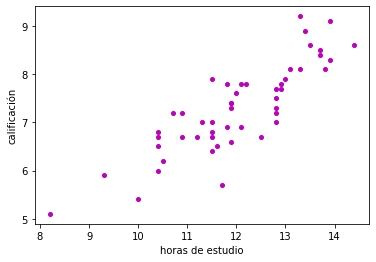

In [5]:
# filtrar la columna horas
print (f"Shape: {df.iloc[:,1].shape}")

# se define el Train X
# agregar una dimensión
X = np.array(df.iloc[:,1], dtype='float32')[..., np.newaxis]

print (f"Shape: {X.shape}")



# filtrar la columna calif
print (f"Shape: {df.iloc[:,-1].shape}")

# se define el Test Y
Y = np.array(df.iloc[:,-1], dtype='float32')[..., np.newaxis]

print (f"Shape: {Y.shape}")

# graficar los datos
plt.plot(X, Y, '.', color='m', markersize=8)
plt.xlabel('horas de estudio')
plt.ylabel('calificación')
plt.show()

In [6]:
# filtrar las columnas: prev, horas
X = np.array(df.iloc[:,:2], dtype="float32")
print (f"Shape x_trn:\t{X.shape}")
print (f"Shape y_trn:\t{Y.shape}")
print (X)

Shape x_trn:	(50, 2)
Shape y_trn:	(50, 1)
[[ 5.6  8.2]
 [ 6.7  9.3]
 [ 5.1 10. ]
 [ 5.7 10.4]
 [ 7.1 10.4]
 [ 6.4 10.4]
 [ 6.1 10.4]
 [ 6.8 10.5]
 [ 6.3 10.7]
 [ 6.2 10.9]
 [ 4.9 10.9]
 [ 5.6 11.2]
 [ 5.9 11.3]
 [ 7.1 11.5]
 [ 6.2 11.5]
 [ 7.  11.5]
 [ 5.4 11.5]
 [ 7.  11.5]
 [ 6.4 11.6]
 [ 4.2 11.7]
 [ 8.  11.8]
 [ 6.7 11.8]
 [ 5.4 11.9]
 [ 7.5 11.9]
 [ 5.7 11.9]
 [ 5.5 11.9]
 [ 7.5 12. ]
 [ 7.  12.1]
 [ 6.1 12.1]
 [ 7.1 12.2]
 [ 5.5 12.5]
 [ 7.9 12.8]
 [ 6.  12.8]
 [ 7.1 12.8]
 [ 5.4 12.8]
 [ 7.7 12.8]
 [ 8.  12.9]
 [ 5.9 12.9]
 [ 8.4 13. ]
 [ 7.3 13.1]
 [ 8.7 13.3]
 [10.1 13.3]
 [ 8.  13.4]
 [ 8.3 13.5]
 [ 6.5 13.7]
 [ 6.6 13.7]
 [ 7.2 13.8]
 [ 7.2 13.9]
 [ 8.7 13.9]
 [ 8.8 14.4]]


## Las clases `TensorDataset` y `DataLoader`
La clase `TensorDataset` crea un conjunto de datos a partir de varios tensores con la primera dimensión coincidente. Las muestras se extraerán de la primera dimensión (filas)<br>
<br>
`DataLoader` crea un cargador de datos a partir del conjunto de datos. El tipo de muestreo y el tamaño del lote se especifican aquí.

### TensorDataset

In [9]:
tds = TensorDataset(torch.Tensor(X), torch.Tensor(Y))
print (tds[0])
print (len(tds))

(tensor([5.6000, 8.2000]), tensor([5.1000]))
50


### DataLoader

In [10]:
# definir el tamño de los lotes a 16 y shuffle=True
def construirDataLoader(batch_size=16, shuffle=True):
    return DataLoader(tds, batch_size=batch_size, shuffle=True)

# creamos un DataLoader
dl = construirDataLoader()

# iter() llama al método __iter__() en el DataLoader que devuelve un iterador.
# next() luego llama al método __next__() en ese iterador para obtener la primera iteración.
# Ejecutar next() nuevamente obtendrá el segundo elemento del iterador, etc.

x, y = next(iter(dl))
print(f'Lote de x shape={x.shape} dtype={x.dtype}')
print(f'Lote de y shape={y.shape} dtype={y.dtype}')

Lote de x shape=torch.Size([16, 2]) dtype=torch.float32
Lote de y shape=torch.Size([16, 1]) dtype=torch.float32


## Entrenamiento

In [ ]:
def set_seed(seed=0):
    """Initializes pseudo-random number generators."""
    # números aleatorios
    import random
    
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

# optimizador
def train(model, dl, epochs=5):

    opt = optim.SGD(model.parameters(), lr=1e-3)

    # historial de pérdida
    loss_hist = []

    # ciclo de entrenamiento
    for epoch in range(epochs):

        # historial
        loss_hist = []
        
        # entrenamiento de una época
        for x, y_true in dl:
            # hacemos inferencia para obtener los logits
            y_lgts = model(x)
            # calculamos de pérdida
            loss = F.mse_loss(y_lgts, y_true)
            # vaciamos los gradientes
            opt.zero_grad()
            # retropropagamos
            loss.backward()
            # actulizamos parámetros
            opt.step()

            # guardamos historial de pérdida
            loss_hist.append(loss.item() * 100)
            
        # imprimimos la pérdida de la época
        loss = np.mean(loss_hist)
        print(f'E{epoch:02} loss=[{loss:6.2f}]')

def train_model(build_model, epochs=5):
    set_seed()
    dl = construirDataLoader()
    model = build_model()
    train(model, dl, epochs)

### Definición de la arquitectura
Para implementar arquitecturas, PyTorch define dos clases fundamentales.<br>
* `nn.Module` define una red neuronal que internamente puede tener otras redes neuronales anidadas (o capas). Tres metodos importantes son:
  * `__init__(self, args)` es el inicilizador que define al objeto,
  * `fordward(x)` realizar predicción (hacia adelante),
  * `parameters(x)` regresa una lista de los parámetros (`nn.Parameter`) de la red y redes anidadas.
* `nn.Parameter` envuelve un tensor solo para marcarlo como parámetro y que sea regresado por `nn.Module.parameters(x)`.

### Alto Nivel
En esta API basta con apilar las capas (del paquete torch.nn) usando la clase `nn.Sequential`.

In [ ]:
def build_high():
    model = nn.Sequential(
        nn.Linear(2, 2),
        nn.ReLU(),
        nn.Linear(2, 1),
    )
    return model

build_high()

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): ReLU()
  (2): Linear(in_features=2, out_features=1, bias=True)
)

### Medio nivel
En esta API heredamos de `nn.Module`, creamos las capas en el inicializador e implementamos la inferencia en el método `fordward`.

In [ ]:
#se define la clase RegLin que hereda de torch.nn.Module
class LinRegMed(nn.Module):

    #se define el inicializador
    def __init__(self):
        # se llama al inicializador de la clase padre
        super().__init__()
        # importante: se definen las capas como atributos de la clase
        self.fc1 = nn.Linear(2, 2)
        self.fc2 = nn.Linear(2, 1)

    # método para inferencia
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

def build_med():
    return LinRegMed()

build_med()

LinRegMed(
  (fc1): Linear(in_features=2, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=1, bias=True)
)

### Bajo Nivel
En esta interfaz debemos implementar las capaz partiendo de los parámetros.

In [ ]:
import math

class MyLinear(nn.Module):

    def __init__(self, in_features, out_features, init):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.init = init
        # se envuelven los tensores en parámetros (clase)
        # para que model.parameters() los regrese
        # y sean visibles al optimizador
        self.weight = nn.Parameter(torch.zeros(out_features, in_features))
        self.bias = nn.Parameter(torch.zeros(out_features))
        if init == 'he':
            self.reset_parameters()

    def reset_parameters(self):
        # Delving Deep into Rectifiers: 
        # Surpassing Human-Level Performance on ImageNet Classification
        # https://arxiv.org/abs/1502.01852
        nn.init.kaiming_uniform_(self.weight, a=math.sqrt(5))
        fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.weight)
        bound = 1 / math.sqrt(fan_in)
        nn.init.uniform_(self.bias, -bound, bound)
        
    def forward(self, x):
        # X * W + B
        return F.linear(x, self.weight, self.bias)
    
    def extra_repr(self):
        return 'in_features={}, out_features={}, init={}, bias={}'.format(
            self.in_features, self.out_features, self.init, self.bias is not None
        )


class LinRegLow(nn.Module):

    def __init__(self, init='zeros'):
        super().__init__()
        
        self.cls = nn.Sequential(
            MyLinear(2, 2, init),
            nn.ReLU(),
            MyLinear(2, 1, init),
        )

    def forward(self, x):
        return self.cls(x)

# ------------------------------------------------------
def build_low_he():
    return LinRegLow(init='he')

build_low_he()

LinRegLow(
  (cls): Sequential(
    (0): MyLinear(in_features=2, out_features=2, init=he, bias=True)
    (1): ReLU()
    (2): MyLinear(in_features=2, out_features=1, init=he, bias=True)
  )
)

### Entrenamos los modelos

In [ ]:
train_model(build_high)

E00 loss=[5240.13]
E01 loss=[2730.91]
E02 loss=[622.67]
E03 loss=[ 47.03]
E04 loss=[ 16.73]


In [ ]:
train_model(build_med)

E00 loss=[5240.13]
E01 loss=[2730.91]
E02 loss=[622.67]
E03 loss=[ 47.03]
E04 loss=[ 16.73]


In [ ]:
train_model(build_low_he)

E00 loss=[5240.13]
E01 loss=[2730.91]
E02 loss=[622.67]
E03 loss=[ 47.03]
E04 loss=[ 16.73]


## Diferenciación Automática
La [diferenciación automática](https://es.wikipedia.org/wiki/Diferenciaci%C3%B3n_autom%C3%A1tica) es un método para la evaluación de derivadas de una función expresada como un programa de computación usualamente conocido como gráfica de cómputo.

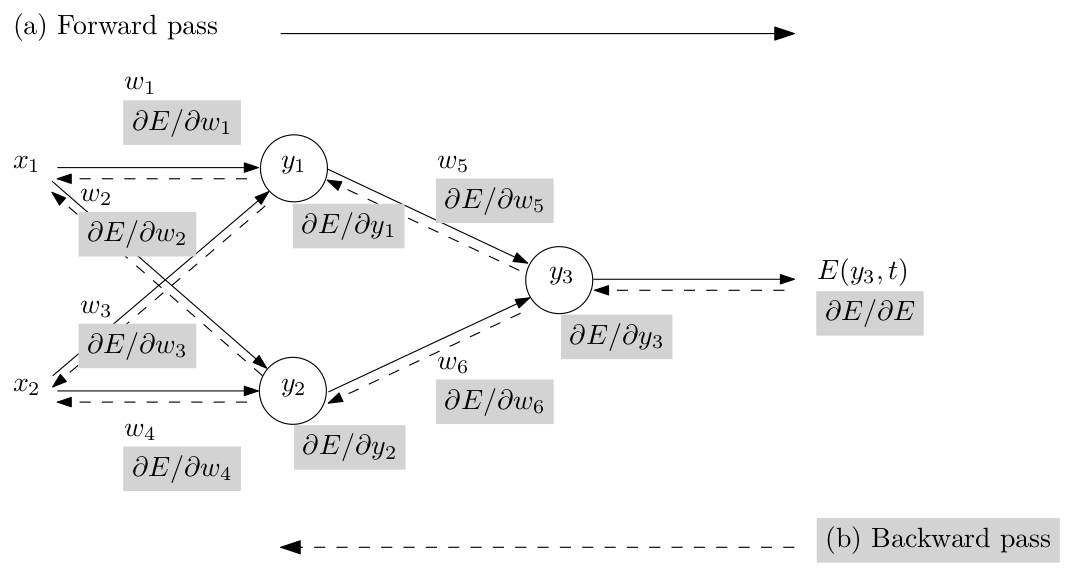

PyTorch permite realizar autodiferenciación manteniendo un arbol de expresiones (gráfica de cómputo) que se ensambla de forma automática conforme se definen las expresiones en el programa.<br>
<br>
Por ejemplo, consideremos la función $f(x, y) = 2 x^{3} + 3 y^{2} + c$  respecto a dos variables independientes $x$ y $y$. Al codificar esta función con tensores, podemos pensar de forma simplificada que Pytorch ensambla (al vuelo y de forma implícita) la siguiente gráfica de cómputo.

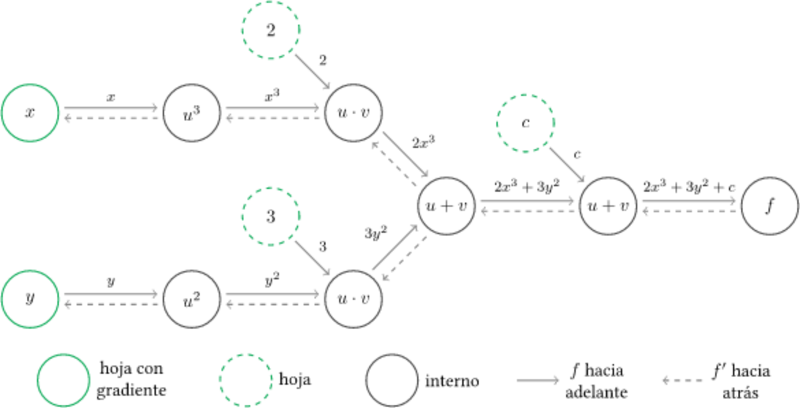

En esta gráfica de cómputo $x$ y $y$ son tensores hoja, mientras que $f$ es un tensor interno (no hoja). Para crear la gráfica de cómputo los tensores están equipados con los siguientes atributos:<br>

* `.grad`: escalar flotante que almacena la evaluación de la derivada,
* `.requires_grad` bandera booleana que indica si tensor
* `.grad_fn` es la derivada $f'$ respecto a los tensores padre en la gráfica de computo.



Para observar como funciona esto, definamos $f(\cdot)$ y derivemos de forma automática con respecto a $x$ y $y$ para obtener $f'_x(2, 3) = 6(2)^2 = 24$, $f'_y(2, 3) = 6(3) = 18$<br>
Primero, definamos tensores con las variables $x$ y $y$ e inspeccionemos sus atributos usados para la autodiferenciación.

In [11]:
# creamos el tensor con rastreo de gradiente activado
x =  torch.tensor(2.0, requires_grad=True)
x, x.grad, x.requires_grad, x.grad_fn

(tensor(2., requires_grad=True), None, True, None)

In [12]:
# creamos el tensor con rastreo de gradiente activado
y =  torch.tensor(3.0, requires_grad=True)
y, y.grad, x.requires_grad

(tensor(3., requires_grad=True), None, True)

In [13]:
# creamos el tensor sin rastreo de gradiente
c =  torch.tensor(1.0)
c, c.grad, c.requires_grad

(tensor(1.), None, False)

Ahora definamos la función $f(\cdot)$ e inspeccionemos sus atributos.

In [14]:
f = 2 * (x ** 3) + 3 * (y ** 2) + c

In [15]:
f

tensor(44., grad_fn=<AddBackward0>)

In [16]:
f.grad

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


PyTorch nos indica con una advertencia ya que $f$ es un tensor interno y su atributo `.grad` no será usado durante la diferenciación automática.

In [17]:
f.requires_grad

True

In [18]:
f.grad_fn

Ahora, computemos las derivadas $f'_x(2, 3)$ y $f'_y(2, 3)$ con el método `backward()`.

In [19]:
f.backward()

In [20]:
x.grad, y.grad, c.grad

(tensor(24.), tensor(18.), None)